In [1]:
# Import Warnings and necessary packages
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Loading Data 


In [2]:
#Import data
lead = pd.read_csv('Leads.csv')
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#Dimensions of data
lead.shape

(9240, 37)

In [4]:
#statistical aspects of data
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
#check type of each column
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## 1.2 Cleaning data

In [6]:
# Replacing 'Select' which needs to be handled because it is as good as a null value
lead = lead.replace('Select', np.nan)

In [7]:
# Checking the percentage of missing values
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [8]:
# dropping columns with more than 30% missing values
lead1 = lead.drop(['How did you hear about X Education', 'Tags', 'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],1)
lead1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified


In [9]:
# Checking the percentage of missing values
round(100*(lead1.isnull().sum()/len(lead1.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [10]:
#columns with only one value
lead1.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

In [11]:
lead1 = lead1.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'],1)
lead1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,Student,Better Career Prospects,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified


In [12]:
lead1['Specialization'] = lead1['Specialization'].fillna('not provided') 
lead1['What matters most to you in choosing a course'] = lead1['What matters most to you in choosing a course'].fillna('not provided')
lead1['Country'] = lead1['Country'].fillna('not provided')
lead1['What is your current occupation'] = lead1['What is your current occupation'].fillna('not provided')
lead1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [13]:
#changing countries as "India", "foreign" and "not provided"
def countries(x):
    cat = ""
    if x == "India":
        cat = "India"
    elif x == "not provided":
        cat = "not provided"
    else:
        cat = "outside india"
    return cat

lead1['Country'] = lead1.apply(lambda x:countries(x['Country']), axis = 1)
lead1['Country'].value_counts()

India            6492
not provided     2461
outside india     287
Name: Country, dtype: int64

In [14]:
# Removing Id values
lead2 = lead1.drop('Prospect ID',1)
lead2.shape

(9240, 22)

In [15]:
lead2 = lead2.drop('Lead Number',1)
lead2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        9240 

In [16]:
lead2 = lead2[lead2.isnull().sum(axis=1) <1]

#  2. Exploratory Data Analysis

#  Univariate Analysis


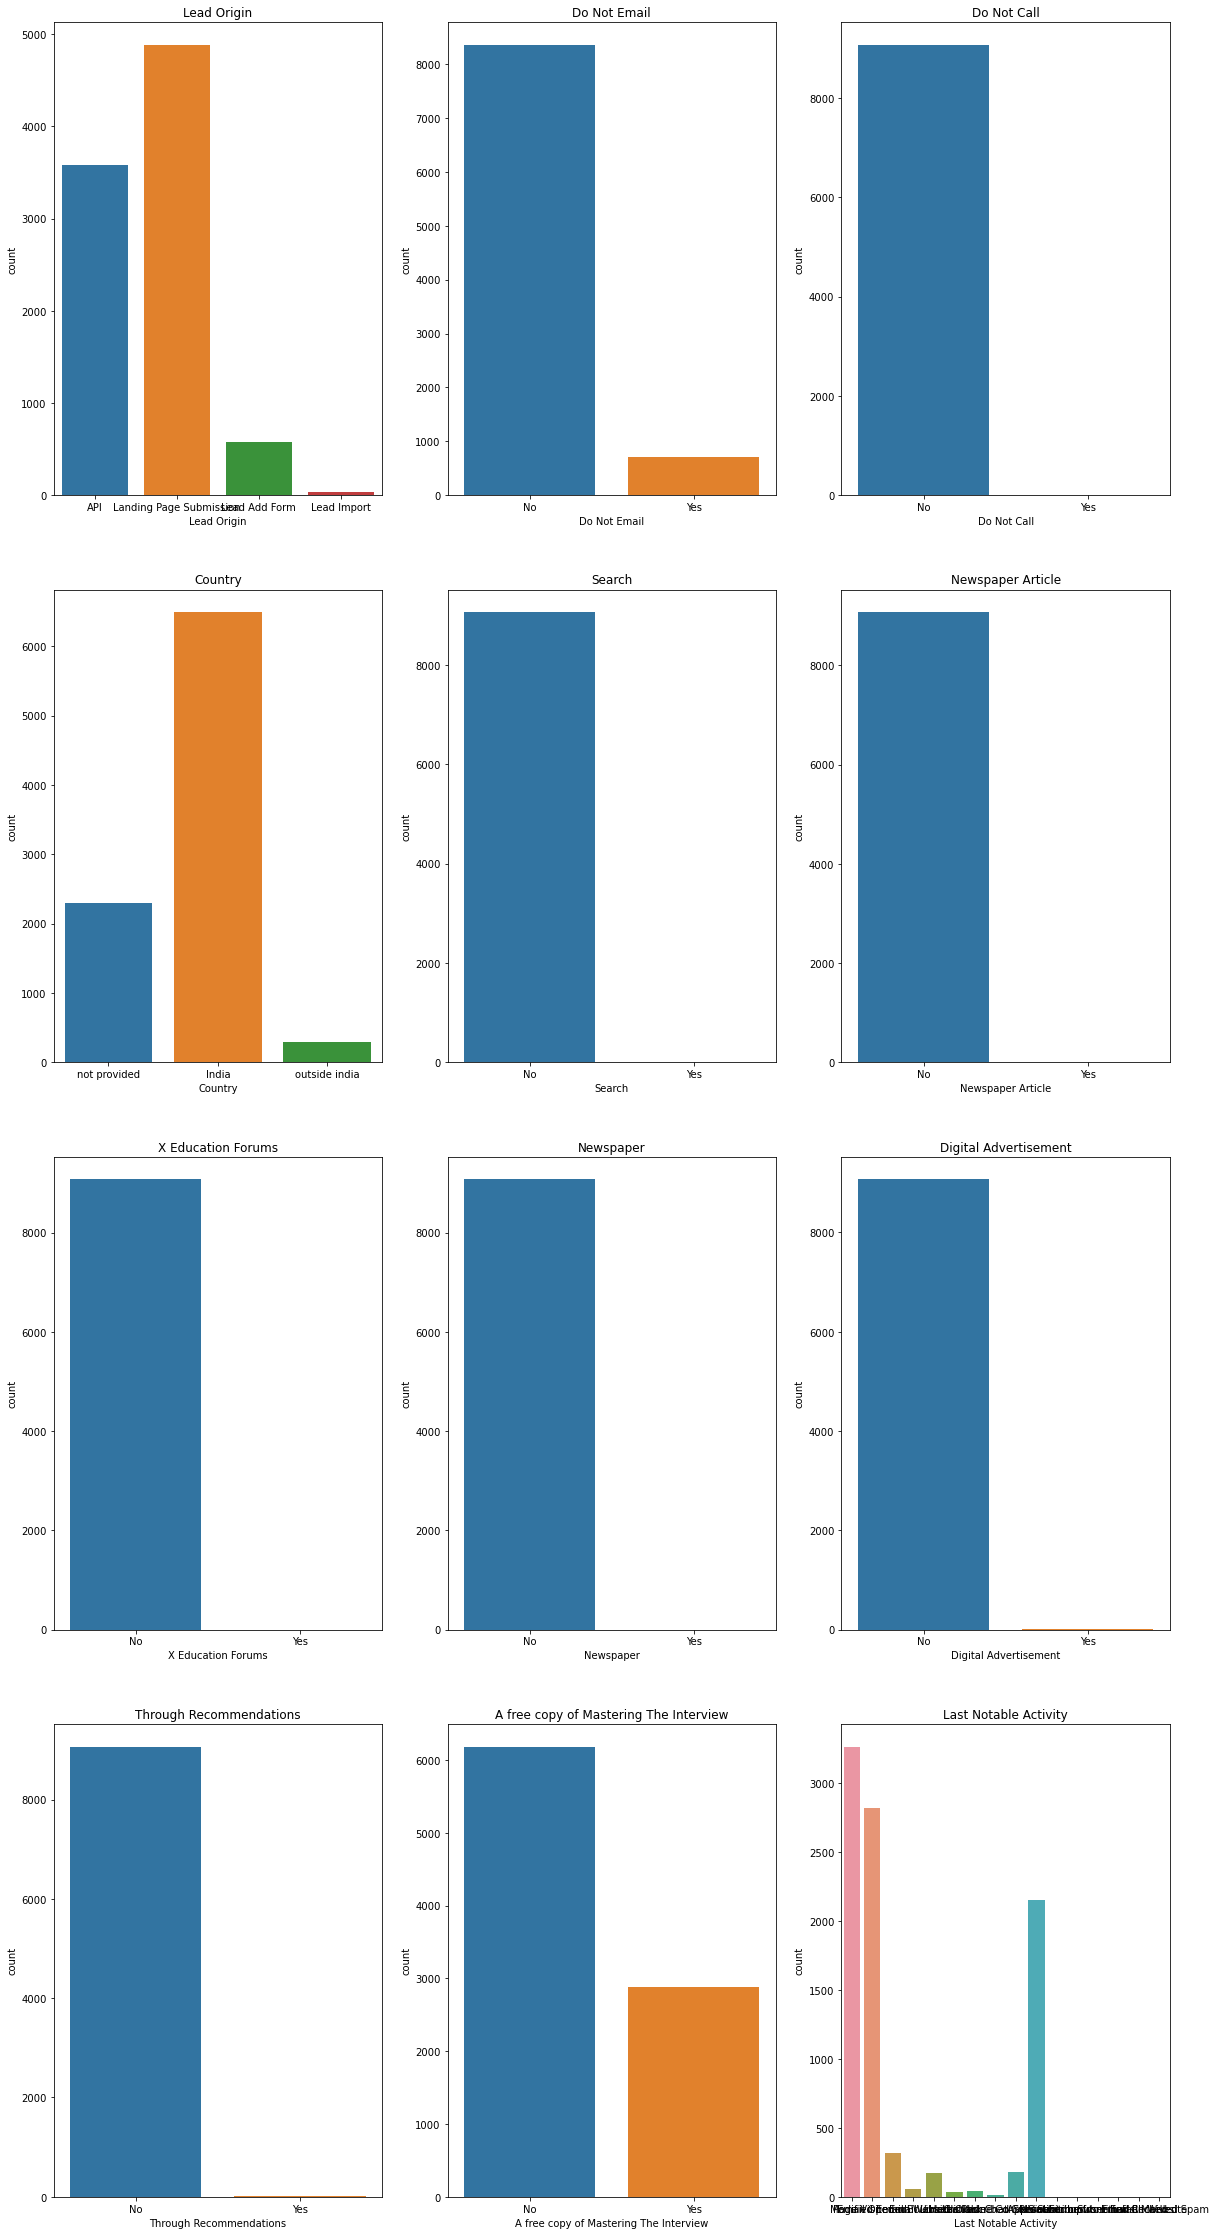

In [17]:
plt.figure(figsize = (20,40))

plt.subplot(4,3,1)
sns.countplot(lead2['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(4,3,2)
sns.countplot(lead2['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(4,3,3)
sns.countplot(lead2['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(4,3,4)
sns.countplot(lead2['Country'])
plt.title('Country')

plt.subplot(4,3,5)
sns.countplot(lead2['Search'])
plt.title('Search')

plt.subplot(4,3,6)
sns.countplot(lead2['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(4,3,7)
sns.countplot(lead2['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(4,3,8)
sns.countplot(lead2['Newspaper'])
plt.title('Newspaper')

plt.subplot(4,3,9)
sns.countplot(lead2['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(4,3,10)
sns.countplot(lead2['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(4,3,11)
sns.countplot(lead2['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(4,3,12)
sns.countplot(lead2['Last Notable Activity'])
plt.title('Last Notable Activity')


plt.show()

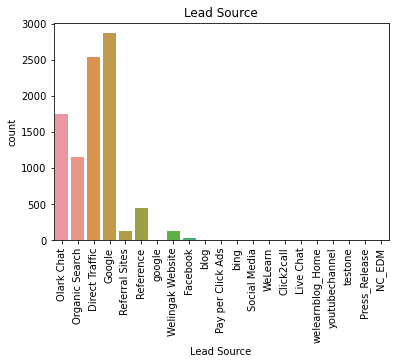

In [18]:
sns.countplot(lead2['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

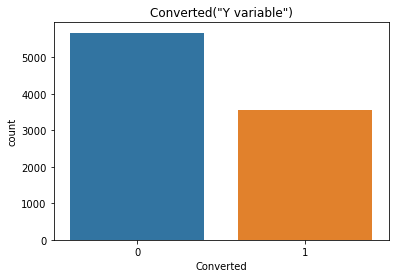

In [19]:
sns.countplot(lead['Converted'])
plt.title('Converted("Y variable")')
plt.show()

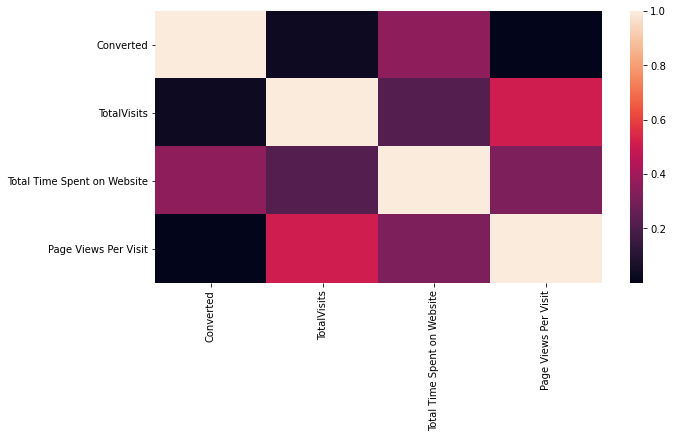

In [20]:
# To check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(lead2.corr())
plt.show()

In [21]:
# Since traget variable is "Converted"   

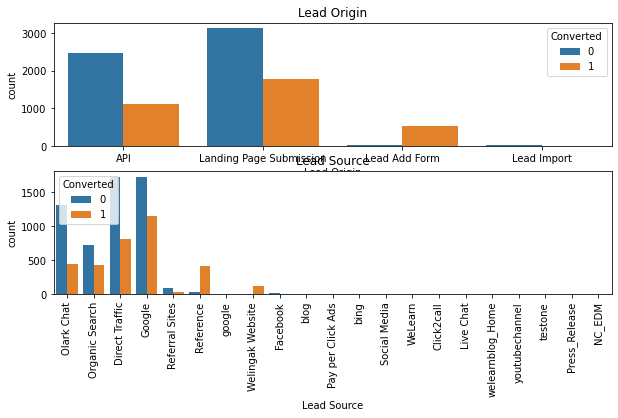

In [22]:
plt.figure(figsize = (10,5))

plt.subplot(2,1,1)
sns.countplot(x='Lead Origin', hue='Converted', data= lead2).tick_params(axis='x')
plt.title('Lead Origin')

plt.subplot(2,1,2)
sns.countplot(x='Lead Source', hue='Converted', data= lead2).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()


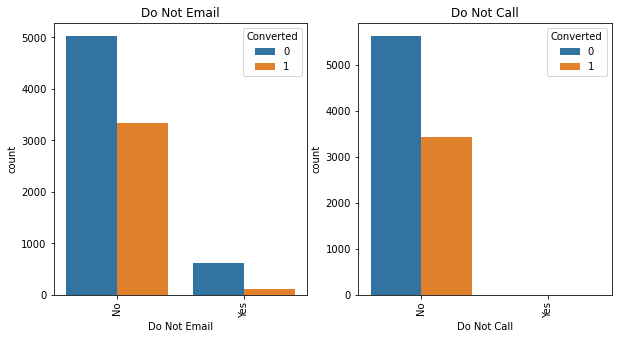

In [23]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= lead2).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= lead2).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

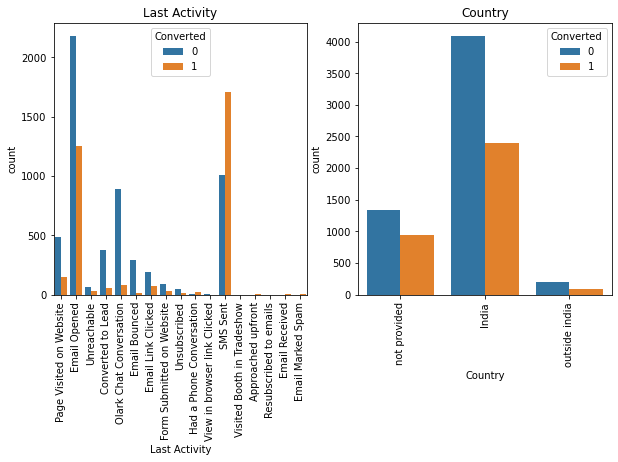

In [24]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= lead2).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= lead2).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

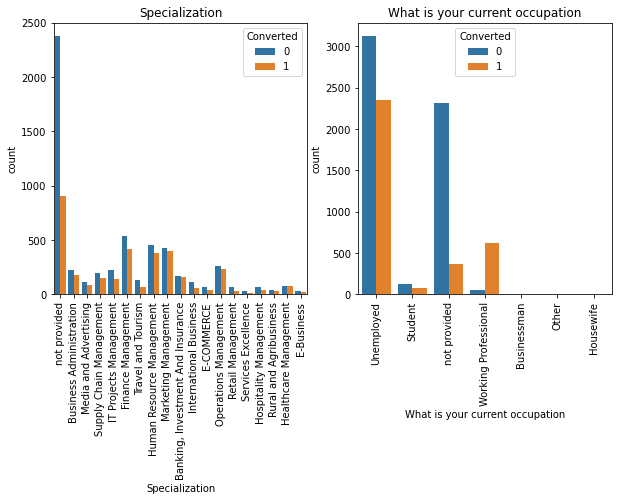

In [25]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= lead2).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= lead2).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

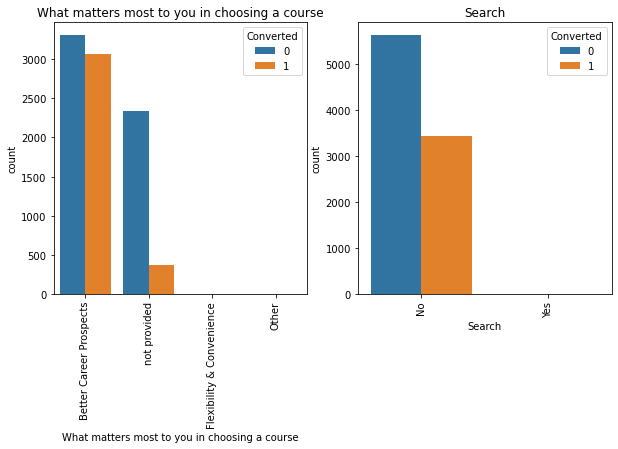

In [26]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= lead2).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= lead2).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

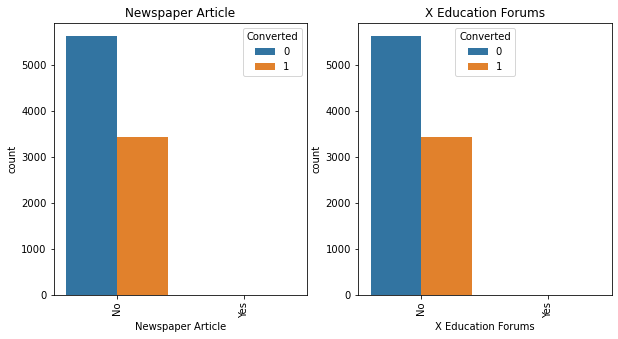

In [27]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= lead2).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= lead2).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

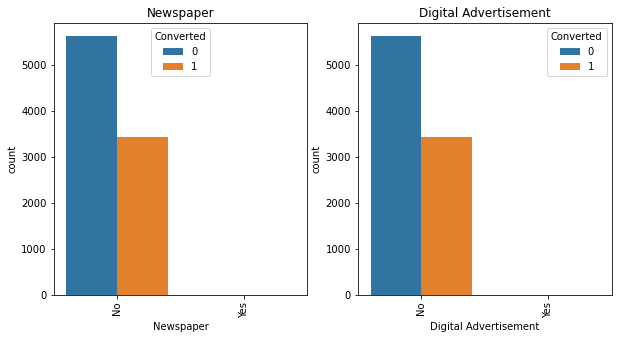

In [28]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= lead2).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= lead2).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

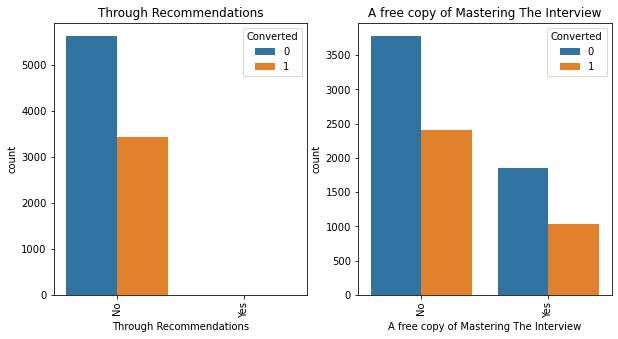

In [29]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= lead2).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= lead2).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

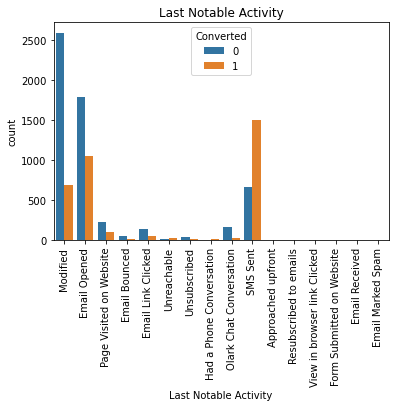

In [30]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= lead2).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

# #. Dummy Variables

In [31]:
#using "get_dummies" for columns with dtype as 'object'
dummies = pd.get_dummies(lead2[['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity']])


In [32]:
lead2_dummies = pd.concat([lead2, dummies], axis=1)
lead2_dummies

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,not provided,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,outside india,...,0,0,0,0,0,0,0,0,0,0
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,...,0,0,0,0,0,0,1,0,0,0
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,...,0,0,0,0,0,0,1,0,0,0
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,...,0,0,0,0,0,0,1,0,0,0


In [33]:
lead2_dummies = lead2_dummies.drop(['What is your current occupation_not provided','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization', 'Specialization_not provided','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
lead2_dummies

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# 4. Train-Test Split

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X = lead2_dummies.drop('Converted', 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [36]:
#assigning target variable as y
y = lead2['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [37]:
# Splitting the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [38]:
#MinMax scaler
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1289,0.014184,0.612676,0.083333,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3604,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5584,0.042553,0.751761,0.250000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7679,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7563,0.014184,0.787852,0.083333,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


# 5. Model Building


In [40]:
#importing 'LogisticRegression' and 'RFE'
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [41]:
logreg = LogisticRegression()

In [42]:
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [43]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('Lead Origin_API', False, 53),
 ('Lead Origin_Landing Page Submission', False, 18),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 52),
 ('Lead Source_Click2call', False, 89),
 ('Lead Source_Direct Traffic', False, 51),
 ('Lead Source_Facebook', False, 33),
 ('Lead Source_Google', False, 72),
 ('Lead Source_Live Chat', False, 66),
 ('Lead Source_NC_EDM', False, 94),
 ('Lead Source_Olark Chat', False, 76),
 ('Lead Source_Organic Search', False, 71),
 ('Lead Source_Pay per Click Ads', False, 93),
 ('Lead Source_Press_Release', False, 79),
 ('Lead Source_Reference', False, 81),
 ('Lead Source_Referral Sites', False, 73),
 ('Lead Source_Social Media', False, 39),
 ('Lead Source_WeLearn', False, 54),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 61),
 ('Lead Source_blog', False, 65),
 ('Lead Source_google', False, 62),
 ('Lead 

In [44]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [45]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [46]:
# Importing statsmodels
import statsmodels.api as sm

In [47]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2632.6
Date:                Mon, 17 Oct 2022   Deviance:                       5265.2
Time:                        21:05:35   Pearson chi2:                 6.48e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -2.3307      0.089    -26.054      0.000      -2.506      -2.155
TotalVisits                                                    5.9130      1.488      3.973      0.000       2.996       8.830
Total Time Spent on Website                                    4.6907      0.169     27.704      0.000       4.359       5.023
Lead Origin_Lead Add Form                                      2.2114      0.227      9.755      0.000       1.767       2.656
Lead Source_Welingak Website                                   2.5805      1.032      2.500      0.012       0.557       4.604
Do Not Email_Yes                                              -1.4299      0.171     -8.342      0.000      -1.766      -1.094
Last Activity_Approached upfront                              23.9572   4.41e+04      0.001      1.000   -8.64e+04    8.65e+04
Last Activity_Had a Phone Conversation                         0.5580      0.845      0.660      0.509      -1.099       2.215
Last Activity_Olark Chat Conversation                         -1.3415      0.166     -8.091      0.000      -1.666      -1.017
Last Activity_SMS Sent                                         1.2813      0.074     17.316      0.000       1.136       1.426
Country_not provided                                           1.6056      0.115     14.019      0.000       1.381       1.830
What is your current occupation_Housewife                     24.3648   3.21e+04      0.001      0.999   -6.29e+04     6.3e+04
What is your current occupation_Working Professional           2.5055      0.194     12.902      0.000       2.125       2.886
What matters most to you in choosing a course_not provided    -1.1860      0.086    -13.826      0.000      -1.354      -1.018
Last Notable Activity_Had a Phone Conversation                23.5185   2.24e+04      0.001      0.999   -4.39e+04     4.4e+04
Last Notable Activity_Unreachable                              1.8339      0.602      3.047      0.002       0.654       3.013
==============================================================================================================================
"""

In [48]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Country_not provided,2.00
6,Last Activity_Had a Phone Conversation,1.89
13,Last Notable Activity_Had a Phone Conversation,1.89
2,Lead Origin_Lead Add Form,1.82
1,Total Time Spent on Website,1.81
0,TotalVisits,1.71
8,Last Activity_SMS Sent,1.48
12,What matters most to you in choosing a course_...,1.41
7,Last Activity_Olark Chat Conversation,1.39
3,Lead Source_Welingak Website,1.31


___The VIF values seem fine but the p-values aren't. So removing 'Last Notable Activity had a phone conversation'___

In [51]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [52]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2636.2
Date:                Mon, 17 Oct 2022   Deviance:                       5272.3
Time:                        21:06:57   Pearson chi2:                 6.48e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -2.3289      0.089    -26.042      0.000      -2.504      -2.154
TotalVisits                                                    5.9676      1.489      4.007      0.000       3.048       8.887
Total Time Spent on Website                                    4.6818      0.169     27.681      0.000       4.350       5.013
Lead Origin_Lead Add Form                                      2.2074      0.227      9.736      0.000       1.763       2.652
Lead Source_Welingak Website                                   2.5845      1.032      2.503      0.012       0.561       4.608
Do Not Email_Yes                                              -1.4334      0.171     -8.368      0.000      -1.769      -1.098
Last Activity_Approached upfront                              22.9566   2.68e+04      0.001      0.999   -5.24e+04    5.25e+04
Last Activity_Had a Phone Conversation                         1.9121      0.676      2.829      0.005       0.587       3.237
Last Activity_Olark Chat Conversation                         -1.3412      0.166     -8.090      0.000      -1.666      -1.016
Last Activity_SMS Sent                                         1.2812      0.074     17.319      0.000       1.136       1.426
Country_not provided                                           1.6045      0.115     14.011      0.000       1.380       1.829
What is your current occupation_Housewife                     23.3635   1.95e+04      0.001      0.999   -3.82e+04    3.82e+04
What is your current occupation_Working Professional           2.5039      0.194     12.894      0.000       2.123       2.885
What matters most to you in choosing a course_not provided    -1.1881      0.086    -13.849      0.000      -1.356      -1.020
Last Notable Activity_Unreachable                              1.8331      0.602      3.047      0.002       0.654       3.012
==============================================================================================================================
"""

In [53]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Country_not provided,2.00
2,Lead Origin_Lead Add Form,1.82
1,Total Time Spent on Website,1.81
0,TotalVisits,1.71
8,Last Activity_SMS Sent,1.48
12,What matters most to you in choosing a course_...,1.41
7,Last Activity_Olark Chat Conversation,1.39
3,Lead Source_Welingak Website,1.31
11,What is your current occupation_Working Profes...,1.18
4,Do Not Email_Yes,1.07


___The VIF values seem fine but the p-values aren't. So removing 'What is your current occupation housewife'___

In [54]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [55]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2641.4
Date:                Mon, 17 Oct 2022   Deviance:                       5282.9
Time:                        21:07:54   Pearson chi2:                 6.48e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -2.3159      0.089    -26.023      0.000      -2.490      -2.141
TotalVisits                                                    5.8807      1.481      3.971      0.000       2.979       8.783
Total Time Spent on Website                                    4.6740      0.169     27.679      0.000       4.343       5.005
Lead Origin_Lead Add Form                                      2.2301      0.227      9.838      0.000       1.786       2.674
Lead Source_Welingak Website                                   2.5635      1.032      2.483      0.013       0.540       4.587
Do Not Email_Yes                                              -1.4369      0.171     -8.391      0.000      -1.772      -1.101
Last Activity_Approached upfront                              21.9544   1.62e+04      0.001      0.999   -3.18e+04    3.18e+04
Last Activity_Had a Phone Conversation                         1.9050      0.676      2.819      0.005       0.581       3.229
Last Activity_Olark Chat Conversation                         -1.3431      0.166     -8.103      0.000      -1.668      -1.018
Last Activity_SMS Sent                                         1.2750      0.074     17.251      0.000       1.130       1.420
Country_not provided                                           1.5923      0.114     13.951      0.000       1.369       1.816
What is your current occupation_Working Professional           2.4978      0.194     12.866      0.000       2.117       2.878
What matters most to you in choosing a course_not provided    -1.1910      0.086    -13.892      0.000      -1.359      -1.023
Last Notable Activity_Unreachable                              1.8268      0.602      3.037      0.002       0.648       3.006
==============================================================================================================================
"""

In [56]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Country_not provided,2.00
1,Total Time Spent on Website,1.81
2,Lead Origin_Lead Add Form,1.81
0,TotalVisits,1.71
8,Last Activity_SMS Sent,1.48
11,What matters most to you in choosing a course_...,1.41
7,Last Activity_Olark Chat Conversation,1.39
3,Lead Source_Welingak Website,1.31
10,What is your current occupation_Working Profes...,1.18
4,Do Not Email_Yes,1.07


In [57]:
X_train.drop('Last Activity_Approached upfront', axis = 1, inplace = True)

In [58]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2644.2
Date:                Mon, 17 Oct 2022   Deviance:                       5288.4
Time:                        21:08:43   Pearson chi2:                 6.49e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -2.3136      0.089    -26.010      0.000      -2.488      -2.139
TotalVisits                                                    5.8751      1.480      3.970      0.000       2.974       8.776
Total Time Spent on Website                                    4.6762      0.169     27.691      0.000       4.345       5.007
Lead Origin_Lead Add Form                                      2.2205      0.227      9.798      0.000       1.776       2.665
Lead Source_Welingak Website                                   2.5639      1.032      2.483      0.013       0.540       4.587
Do Not Email_Yes                                              -1.4386      0.171     -8.402      0.000      -1.774      -1.103
Last Activity_Had a Phone Conversation                         1.9029      0.676      2.816      0.005       0.578       3.227
Last Activity_Olark Chat Conversation                         -1.3504      0.166     -8.150      0.000      -1.675      -1.026
Last Activity_SMS Sent                                         1.2717      0.074     17.212      0.000       1.127       1.416
Country_not provided                                           1.6016      0.114     14.047      0.000       1.378       1.825
What is your current occupation_Working Professional           2.4955      0.194     12.855      0.000       2.115       2.876
What matters most to you in choosing a course_not provided    -1.1945      0.086    -13.937      0.000      -1.362      -1.027
Last Notable Activity_Unreachable                              1.8240      0.602      3.032      0.002       0.645       3.003
==============================================================================================================================
"""

In [59]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Country_not provided,2.00
1,Total Time Spent on Website,1.81
2,Lead Origin_Lead Add Form,1.81
0,TotalVisits,1.71
7,Last Activity_SMS Sent,1.48
10,What matters most to you in choosing a course_...,1.41
6,Last Activity_Olark Chat Conversation,1.39
3,Lead Source_Welingak Website,1.31
9,What is your current occupation_Working Profes...,1.18
4,Do Not Email_Yes,1.07


## 6. Prediction

In [60]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1289    0.653572
3604    0.129375
5584    0.234824
7679    0.129375
7563    0.503833
7978    0.782656
7780    0.168697
7863    0.983248
838     0.768465
708     0.148026
dtype: float64

In [61]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.65357163, 0.12937452, 0.23482391, 0.12937452, 0.50383326,
       0.78265639, 0.16869713, 0.98324814, 0.76846462, 0.14802572])

In [62]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.653572
1,0,0.129375
2,0,0.234824
3,0,0.129375
4,0,0.503833


In [63]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.653572,1
1,0,0.129375,0
2,0,0.234824,0
3,0,0.129375,0
4,0,0.503833,1


### 7. Model Evaluation

In [64]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [65]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3427,  468],
       [ 744, 1712]], dtype=int64)

In [66]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8091639111950873

In [67]:
metrics.f1_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7385677308024158

In [68]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [69]:
# Calculating the sensitivity
TP/(TP+FN)

0.6970684039087948

In [70]:
# Calculating the specificity
TN/(TN+FP)

0.8798459563543004

### 8. ROC Curve

In [72]:
# ROC function
def new_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [73]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

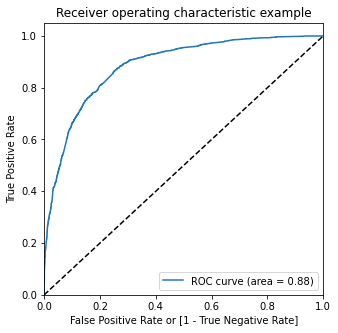

In [74]:
# Call the ROC function
new_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### 9. Prediction on Test

In [75]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [76]:
# Substituting all the columns in the final train model
col = X_train.columns

In [77]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Country_not provided,What is your current occupation_Working Professional,What matters most to you in choosing a course_not provided,Last Notable Activity_Unreachable
8308,1.0,0.035461,0.416813,0,0,0,0,0,0,0,0,0,0
7212,1.0,0.028369,0.001320,0,0,0,0,0,1,0,1,0,0
2085,1.0,0.000000,0.000000,1,1,0,0,0,0,1,0,0,0
4048,1.0,0.028369,0.617077,0,0,0,0,0,1,0,0,0,0
4790,1.0,0.028369,0.005282,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,1.0,0.000000,0.000000,0,0,0,0,1,0,1,0,0,0
8179,1.0,0.170213,0.148768,0,0,0,0,0,1,0,0,1,0
6236,1.0,0.000000,0.000000,0,0,0,0,0,0,1,0,1,0
5240,1.0,0.078014,0.458627,0,0,0,0,0,1,0,0,0,0


In [78]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.461049
1,1,0.835679
2,1,0.983248
3,1,0.881881
4,0,0.106958


In [79]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.461049,1
1,1,0.835679,1
2,1,0.983248,1
3,1,0.881881,1
4,0,0.106958,0
...,...,...,...
2718,1,0.112804,0
2719,0,0.368022,1
2720,0,0.129375,0
2721,1,0.826509,1


In [80]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8108703635695924

In [81]:
metrics.f1_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7551117451260104

In [82]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1414,  330],
       [ 185,  794]], dtype=int64)

In [83]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [84]:
# Calculating the sensitivity
TP/(TP+FN)

0.8110316649642493

In [85]:
# Calculating the specificity
TN/(TN+FP)

0.8107798165137615

___With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%.___

### Precision-Recall

In [86]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3427,  468],
       [ 744, 1712]], dtype=int64)

In [87]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7853211009174312

In [88]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6970684039087948

___With the current cut off as 0.35 we have Precision around 78% and Recall around 70%___

### 10. Prediction on Test set

In [89]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.461049
1,1,0.835679
2,1,0.983248
3,1,0.881881
4,0,0.106958


In [90]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.461049,1
1,1,0.835679,1
2,1,0.983248,1
3,1,0.881881,1
4,0,0.106958,0
...,...,...,...
2718,1,0.112804,0
2719,0,0.368022,0
2720,0,0.129375,0
2721,1,0.826509,1


In [91]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8163789937568858

In [92]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1472,  272],
       [ 228,  751]], dtype=int64)

In [93]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [94]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7341153470185728

In [95]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7671092951991828

With the current cut off as 0.41 we have Precision around 73% and Recall around 75%